In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lab 9: Audio Signal Manipulation
### **Introduction to Communication Systems** - Fall 2020 <br>
**TAs: Eng. Mariham Rezk & Eng. Mahmoud Shabaan**

In this lab , we will manipualte audio files by fitlering the signal, playing the audio before and after filtering. 
Spectograms and convolution will be introduced. 

In [177]:
# First, the usual bookkeeping
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [178]:
# We define some useful constants:
pii = np.pi # Identifying pi 
j = np.complex(0,1) # identifying the complex number j

Now, we redefine the time_axis function using sampling frequency = 20 * fm

In [179]:
def time_axis(fm):
    """
    Function that resturn time axis ranging from -2 * fm to 2 * fm with sampling frequency fs  = 20 * fm
    fm : signal frequency
    fs: sampling frequecny 
    return t: time axis 
    """
    fs = 20 * fm
    ts =1 / fs
    t = np.arange(-2 / fm, 2 / fm, ts)
    return t, fs

In [180]:
#Basic rectangular pulse
def rect(t):
    """
    Function that creates a rectagular Pulse signal with time axis t
    t : time
    return rectagular pulse signal 
    """
    return  1*(abs(t) < 1)

### Creating some signals <br>
**1. Sin Waveform** <br>
X=$sin(2*\pi*fm*t) $ <br>
Define a sine waveform with frequency = 2 Hz. Then, plot the waveform in time.

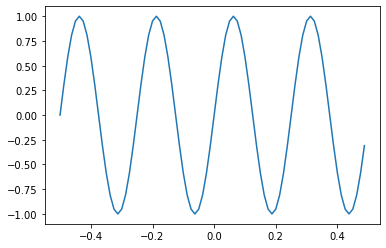

In [181]:
# Your code here
fm = 4
t1, fs1 = time_axis(fm)
x = np.sin(2 * pii * fm * t1) 
x1 = np.sin(2 * pii * 2 * t1)
#z = np.concatenate(x, x1)

plt.plot(t1,x)

**2. Rect pulse waveform** <br>
Plot a rectangular pulse waveform, zero centered and width =2.


(0.8, 1.5)

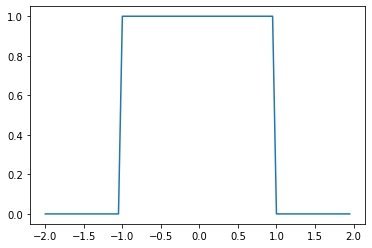

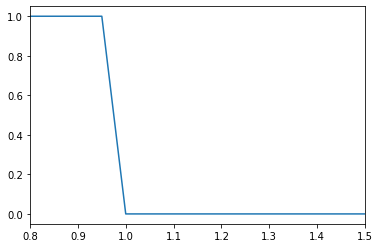

In [182]:
t_rect, fs_rect = time_axis(1)
x2 = rect(t_rect)


plt.plot(t_rect, x2)
plt.figure()

plt.plot(t_rect, x2)
plt.xlim(0.8, 1.5) # re-plot showing the falling edge of the rectangular waveform 

### **Fourier Transform and Inverse Transform**  <br>

In Python, we will use the `fft` module in Numpy to compute the DFT, and `ifft` to compute inverse DFT

Check the following link for the documenation of  the `fft` module:
[link text]((https://numpy.org/doc/stable/reference/routines.fft.html))

In [183]:
def Fourier_Transform (x,fs):
    """
    Function that calculates the fourier tranform of a given signal x
    x : Input signal
    fs : sampling frequency of input signal
    return X: calculated fourier transform of signal, f: Frequency axis for the calculated frouier transorm 
    """    
    X = np.fft.fft(x);
    f = np.fft.fftfreq(len(X), (1/fs))
    return X, f

1.Sketch the fourier Transform of the sine wave in frequency domain.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

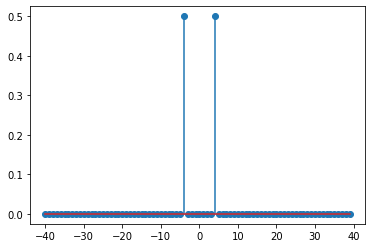

In [184]:
#Sin/Cos Wave
y, f = Fourier_Transform(x, fs1)

plt.stem(f , abs(y)/fs1)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=80).
  


Text(0, 0.5, 'Frequency')

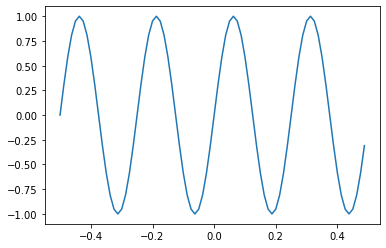

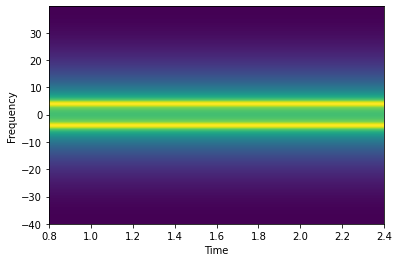

In [185]:
tt = np.fft.ifft(y)

plt.plot(t1, tt)
plt.figure()

plt.specgram(tt, Fs = fs1)
plt.xlabel('Time')
plt.ylabel('Frequency')

2.Sketch the fourier Transform of the rect pulse in frequency domain.

80


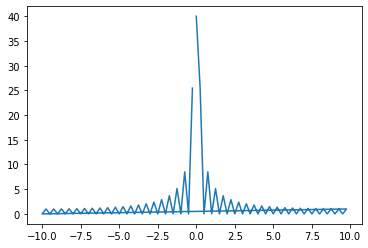

In [186]:
#rectangular pulse
y2, f2 = Fourier_Transform(x2, fs_rect) 

plt.plot(f2, abs(y2))
print(len(y2))

Calculate the inverse Fourier transform of sinc above and plot it 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


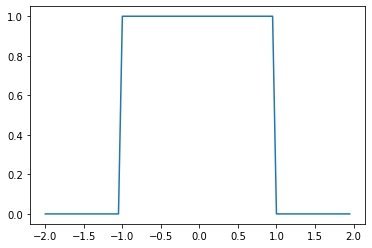

In [187]:
# Your code here
rct = np.fft.ifft(y2)

plt.plot(t_rect, rct)

In real-time applications, fitlers are generated(rectangular shape in frequency) by generating sinc function in time. Due to processing limitations, we can't generate infinte length signals, so we have to truncate the sinc by multiplying it by a rectangular function. The effect of truncating can be shown in the cell below:

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstructed Rect filter from truncated sinc function')

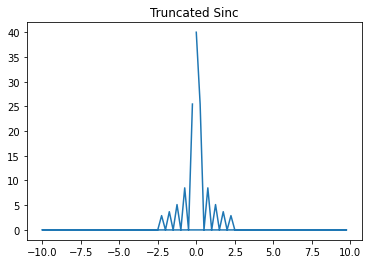

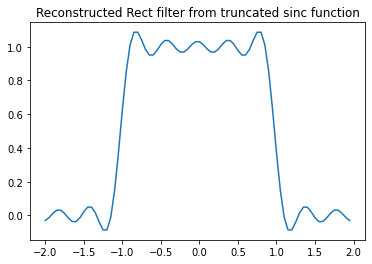

In [188]:
y2_truncated = y2 * rect(f2/2.5)
plt.plot(f2, abs(y2_truncated))
plt.title("Truncated Sinc")

plt.figure()

rct = np.fft.ifft(y2_truncated)
plt.plot(t_rect, rct)
plt.title("Reconstructed Rect filter from truncated sinc function")


### **Fourier Transform Applicatin in real world**  <br>

The next step is to use the DFT to analyze real-world signals. As we have seen in previous examples, what we need to do is set the time interval between samples or, in other words, set the "clock" of the system. For audio, this is equivalent to the sampling rate of the file.

Here for instance is the sound of a piano.

In [189]:
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("/content/drive/MyDrive/piano.wav")
IPython.display.Audio(xm, rate=Fs)


Now, we show the audio file in time, and plot its spectogram 

Text(0, 0.5, 'Frequency')

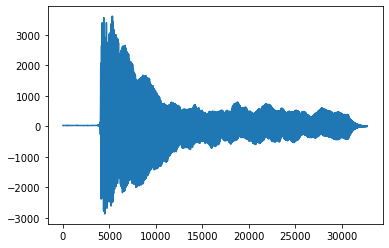

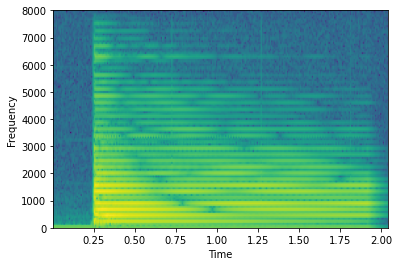

In [190]:
plt.plot(xm)

plt.figure()
plt.specgram(xm, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

Calcualte and plot the Fourier Transform of the audio

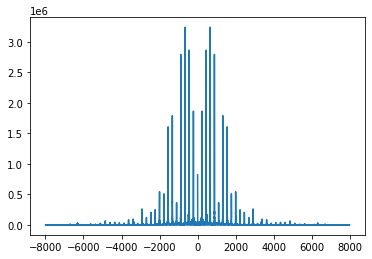

In [191]:
# Your code here
y3, f3 = Fourier_Transform(xm, Fs)   

plt.plot(f3, abs(y3))


Now, we would like to  filter the signal, we will use ideal rectangular widnow to filter frequencies grearer than 2000 Hz 

In [192]:
# Your code here
filter = f3>2000 #rect((f3/2000)<1)

Apply the filter the piano wave signla.
Show the filtered signal in time and frequency domains. Also plot its spectogram

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency')

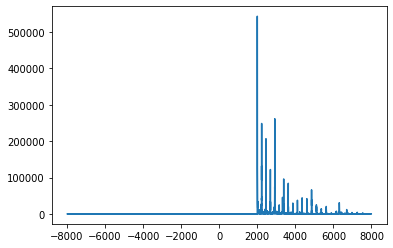

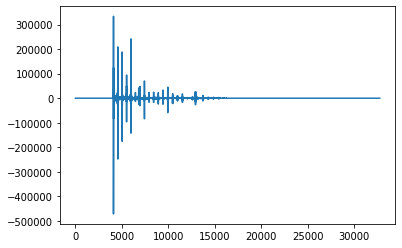

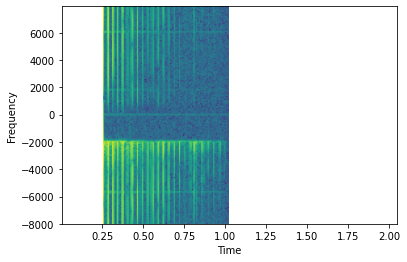

In [193]:
filtered = y3*filter
plt.plot(f3, abs(filtered))

plt.figure()

plt.plot(filtered)

plt.figure()
plt.specgram(filtered, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

Apply Inverse Fourier transform to the filtered signal and play it.

In [194]:
x_filtered  = np.fft.ifft(filtered)
IPython.display.Audio(x_filtered, rate=Fs)

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Now, we show the filter in time domain

(32768,)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


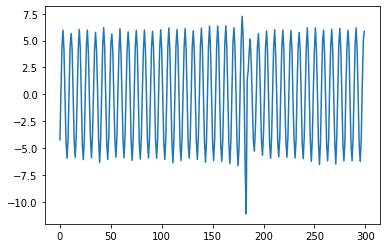

In [195]:
filtr_time = np.fft.fftshift(np.fft.ifft(filtered))

#time = np.linspace()
print(filtr_time.shape)
plt.plot(filtr_time[16200:16500])

### Exponential Filter
Now, we use exponential filter instead of rectangular filter, the exponential filter in time domain is shown in the figure below.
![exponential form](./exp1.JPG)
The magnitude and pahse response of the filter is also shown below
![exponential form](./exp2.JPG)

Define an exponential signal with a = - 2

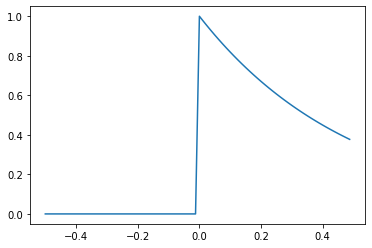

In [196]:
exp = np.exp(-2 * t1) * (t1>0)

plt.plot(t1, exp)

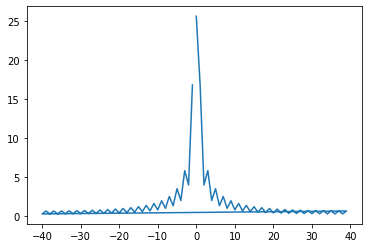

In [197]:
exp_fft, f = Fourier_Transform(exp, fs1)

plt.plot(f, abs(exp_fft))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

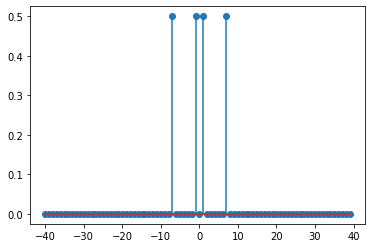

In [198]:
y = np.sin(2 * pii * 1 * t1) + np.sin(2 * pii * 7 * t1)
y_fft, f = Fourier_Transform(y, fs1)
y_fft *= 1/fs1
plt.stem(f, abs(y_fft))


Apply thr filter to the signal above

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

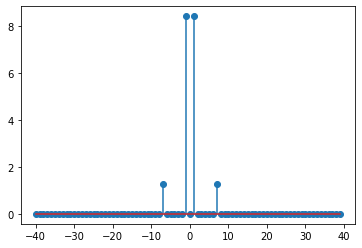

In [199]:
y_filtered = y_fft * exp_fft
plt.stem(f, abs(y_filtered))

## Assignmnet: Audio File Manipulation

You are required to read a musical audio file, seperate each instrument audio by filetering in the frequency domain 

First, read and play the audio file named "final_project_.wav"

In [200]:
# Your code here
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("/content/drive/MyDrive/final_project_.wav")
IPython.display.Audio(xm, rate=Fs)

Now, apply FFT to plot the spectrum of the audio file

(array([[4.85788268e-03, 4.13499140e+01, 1.59539446e+01, ...,
         1.36655470e+04, 3.26603492e+04, 1.19690468e+04],
        [5.21854419e+02, 3.43712728e+03, 4.71028582e+03, ...,
         7.29513802e+03, 2.18463859e+04, 5.55908176e+03],
        [5.07845525e+03, 1.05763683e+04, 5.59595252e+03, ...,
         7.60159581e+01, 5.16542785e+02, 1.37711519e+02],
        ...,
        [7.36891603e-06, 2.95861820e-06, 2.16799394e-06, ...,
         4.32996640e-08, 9.88922157e-07, 2.26739954e-07],
        [6.77865336e-06, 4.80950013e-06, 1.34765992e-07, ...,
         9.33617999e-08, 1.18282057e-07, 1.29799416e-06],
        [9.98101267e-07, 1.46423530e-06, 3.80012735e-08, ...,
         2.44564463e-07, 6.43979383e-07, 2.02757839e-06]]),
 array([    0.,   375.,   750.,  1125.,  1500.,  1875.,  2250.,  2625.,
         3000.,  3375.,  3750.,  4125.,  4500.,  4875.,  5250.,  5625.,
         6000.,  6375.,  6750.,  7125.,  7500.,  7875.,  8250.,  8625.,
         9000.,  9375.,  9750., 10125., 10500., 1

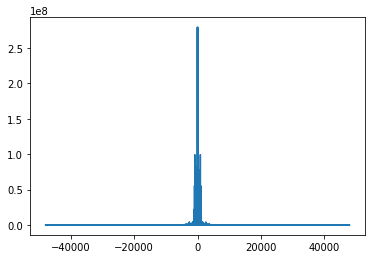

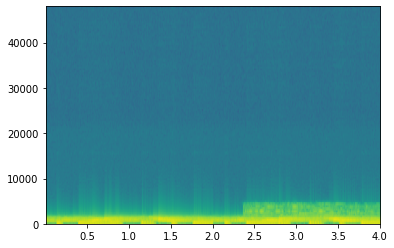

In [201]:
# your code here
# Your code here
y4, f4 = Fourier_Transform(xm, Fs)   
plt.plot(f4, abs(y4))
plt.figure()
plt.specgram(xm, Fs = Fs)


**1. Filtering audio file into 3 signals**<br>

**Bass:** Frequency from -500 to 500 Hz

**Harps:** Frequency from 500 to 1250 Hz & -500 to -1250 Hz

**Guitar:** Frequency from 1400 to 4400 Hz & -1400 to 4400 Hz

Filter and plot each filtered signal according to the specifications above, after play each filtered audio.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency')

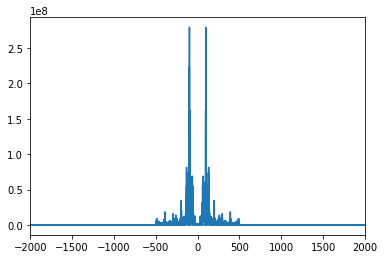

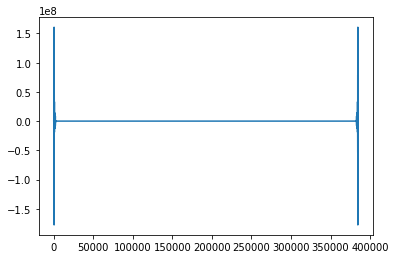

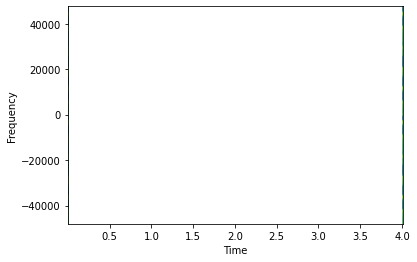

In [202]:
#BASS
filter1= f4>=-500 
filter2=f4<=500 
filtered = y4*filter1*filter2
plt.plot(f4, abs(filtered))
plt.xlim(-2000,2000)
plt.figure()

plt.plot(filtered)

plt.figure()
plt.specgram(filtered, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency')

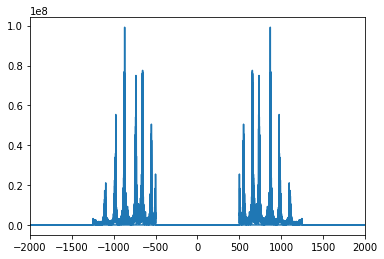

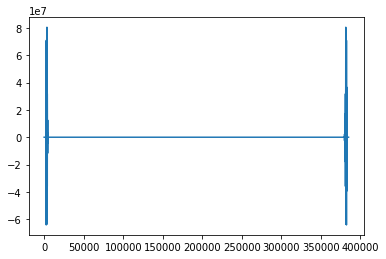

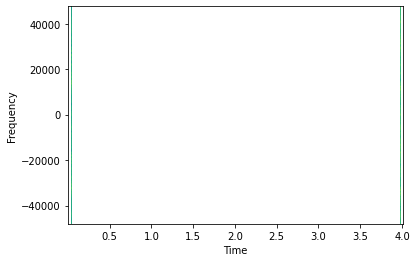

In [203]:
#harps
filter1= f4>= -1250
filter2=f4<=-500 
filter3= f4>= 500
filter4=f4<=1250 
filtered = y4*filter1*filter2
filtered2=y4*filter3*filter4
filtered3=filtered+filtered2
plt.plot(f4, abs(filtered3))
plt.xlim(-2000,2000)
plt.figure()

plt.plot(filtered3)

plt.figure()
plt.specgram(filtered3, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency')

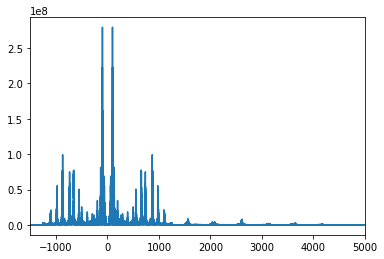

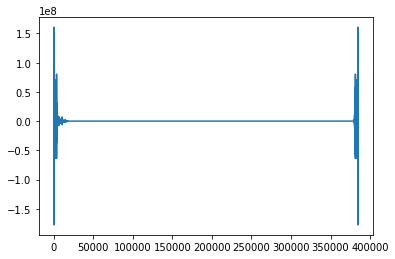

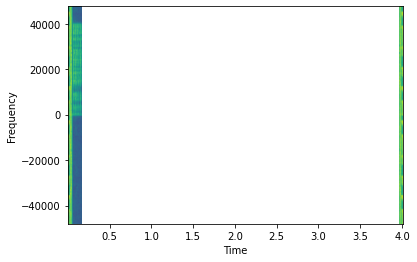

In [204]:
#Guitar
#Frequency from 1400 to 4400 Hz & -1400 to 4400 Hz
#harps
filter1= f4>= -1400
filter2=f4<=4400 
filter3= f4>= 1400
filter4=f4<=4400
filtered = y4*filter1*filter2
filtered2=y4*filter3*filter4
filtered3=filtered+filtered2
plt.plot(f4, abs(filtered3))
plt.xlim(-1500,5000)
plt.figure()

plt.plot(filtered3)

plt.figure()
plt.specgram(filtered3, Fs = Fs)

plt.xlabel('Time')
plt.ylabel('Frequency')
# your code here

**2. Frequecny shifting the audio file**<br>
Read the audio file "speech.wav", an speech audio file. Next, we woulk like to frequency shift the audio spectrum to be centered around 500 Hz.

By shifting the audio file to 500 Hz, while the bandwidth of the signal is greater than 500 Hz, the signal suffers from aliaing distortion, which makes the speech sound like old movies robot audio!


Read the audio file "speech.wav"

In [205]:
# your code here
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("/content/drive/MyDrive/speech.wav")

IPython.display.Audio(xm, rate=Fs)


Now, apply FFT to plot the spectrum of the audio file

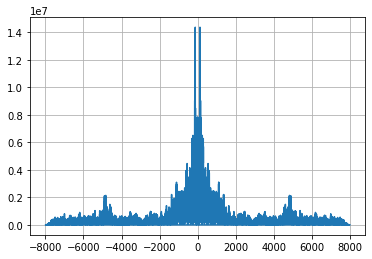

In [206]:
# your code here
XF, F = Fourier_Transform (xm,Fs)
plt.plot(F,abs(XF))
plt.grid()

After, we create the exponential signal to shift the speech signal in frequency (i.e. use Fourier transform properties), instead of using exponential signal which is complex, we use cosine signal, which consists of 2 exponential as follows:

![exponential form](./sinusiodal.PNG)


In [207]:
F_carrier = 500
w = (float(F_carrier) / Fs) * 2 * np.pi
c = np.cos(w * np.arange(0,len(xm)))

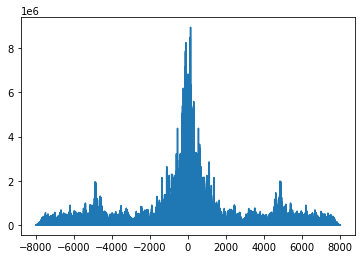

In [208]:
# Apply Frequency shifting for the audio signal spectrum using the cosine signal defined above,
# also plot  the shifted signal spectrum
# your code here
XF=XF*c
plt.plot(F,abs(XF))



In [209]:
# Play shifted audio signal to see the aliasing effect
# your code here 
IPython.display.Audio(XF, rate=Fs)

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Now, modify the cosine signal above to prevent aliasing  distortion, i.e. shift the audio spectrum without the negative and postive parts of spectrum intersecting.

In [210]:
# your code here 

**3. Adding 2 audio files**<br>

Read the 2 audio files:

**sample1.wav** (Bill Gates saying: "Write a fond note to the friend you cherish.")

**sample2.wav** (Stephen Hawkings saying: "Write a fond note to the friend you cherish..")

In [211]:
# read first audio file 
# your code here
import IPython
from scipy.io import wavfile
Fs1, xm1 = wavfile.read("/content/drive/MyDrive/sample1.wav")

IPython.display.Audio(xm1, rate=Fs1)

In [212]:
# read second audio file 
# your code here
import IPython
from scipy.io import wavfile
Fs, xm = wavfile.read("/content/drive/MyDrive/sample2.wav")

IPython.display.Audio(xm, rate=Fs)

All we want is to add these 2 audio files, i.e. play them at the same time!

In [213]:
# your code here

